#  Sum of bias-variance tradeoffs - Figure 2

In [1]:
import matplotlib.pyplot as plt
#%matplotlib notebook
#import matplotlib.pyplot as plt
from numpy import *
import numpy as np

In [2]:
def risk(thetas,sigmas,stepsize,k,sigma_noise,n):
    out =  sigmas**2*(1-stepsize*sigmas**2)**(2*k) @ thetas**2
    out += np.sum( (sigma_noise**2/n)*(1-(1-stepsize*sigmas**2)**k)**2 )
    out += sigma_noise**2
    return out

def res_to_mtx(losses,filename):
    ks = [i for i in range(len(losses[0]))]
    A = [np.array(ks)]
    A += losses
    A = np.vstack( A ).T
    print(A.shape)
    np.savetxt(filename, A, delimiter=' ')

def savemtx_for_logplot(A,filename = "exp.dat"):
    ind = sorted(list(set([int(i) for i in np.geomspace(1, len(A[0])-1 ,num=700)])))
    A = [ [a[i] for i in ind]  for a in A]
    X = np.array([ind] + A)
    np.savetxt(filename, X.T, delimiter=' ')

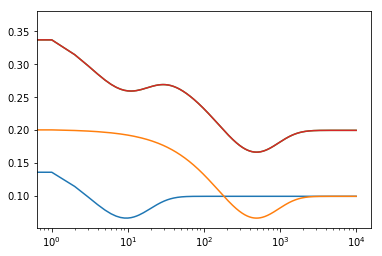

In [3]:
sigma_noise = 1.0
kmax = 10000
dm = 1

s1 = 1.0
t1 = 1.5

s2 = 0.15
t2 = 10.0

sigmas1 = np.array([s1]*dm)
thetas1 = np.array( [t1]*dm)*0.3
sigmas2 = np.array([s2]*dm)
thetas2 = np.array([t2]*dm)*0.3

sigmas = np.hstack( (sigmas1 , sigmas2) ) 
thetas = np.hstack( (thetas1 , thetas2) ) 

n = len(thetas)*5
stepsize = 0.05

risks1 = np.array([risk(thetas1,sigmas1,len(thetas)*stepsize,k,sigma_noise,n) for k in range(1,kmax+1)])
risks2 = np.array([risk(thetas2,sigmas2,len(thetas)*stepsize,k,sigma_noise,n) for k in range(1,kmax+1)])
risks  = np.array([risk(thetas,sigmas,len(thetas)*stepsize,k,sigma_noise,n) for k in range(1,kmax+1)])

riskssum = risks1 + risks2

plt.xscale('log')
#plt.yscale('log')
plt.plot(risks1 - sigma_noise**2)
plt.plot(risks2 - sigma_noise**2)
plt.plot(risks - sigma_noise**2)
plt.plot(riskssum - 2*sigma_noise**2)
plt.show()

savemtx_for_logplot( np.array([risks1-sigma_noise**2,risks2-sigma_noise**2,risks-sigma_noise**2]),"risk_separate.dat" ) 

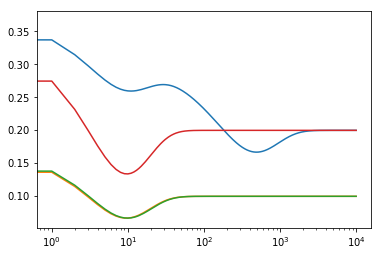

In [4]:
plt.xscale('log')
#plt.yscale('log')
risks22 = np.array([risk(thetas2,sigmas2,len(thetas)*stepsize*43,k,sigma_noise,n) for k in range(1,kmax+1)])

risksnewsum = risks1+risks22
plt.plot(riskssum - 2*sigma_noise**2)
plt.plot(risks1 - sigma_noise**2)
plt.plot(risks22 - sigma_noise**2)
plt.plot(risksnewsum - 2*sigma_noise**2)
#plt.plot(riskssum)
plt.show()

mtx = np.array([risks1-sigma_noise**2,risks2-sigma_noise**2,risks22-sigma_noise**2,riskssum - 2*sigma_noise**2,risksnewsum - 2*sigma_noise**2 ] )

savemtx_for_logplot( mtx,"risk_separate.dat" ) 